***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv', sep = ',')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

Classes de renda:

A ► Acima de 788 * 25 SM

B ► De 788 * 15 a 788 * 25 SM

C ► De 788 * 5 a 788 * 15 SM

D ► De 788 * 2 a 788 * 5 SM

E ► Até 788 * 2 SM

In [4]:
#verificar o valor mínimo de renda que temos na base
dados['Renda'].min()

0

In [5]:
#verificar o valor máximo de renda que temos na base
dados['Renda'].max()

200000

In [6]:
classes_renda = [0, (788*2), (788*5), (788*15), (788*25), 200000]

### 2º Definir os labels das classes

In [7]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [8]:
#vamos seguimentar nosso dataframe com as nossas classes e labels
pd.cut(dados['Renda'],
       bins = classes_renda,
       labels = labels,
       include_lowest = True)

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [9]:
#com os labels criados, vamos entender a frequencia (quantas pessoas temos em cada faixa de renda)
frequencia = pd.value_counts(pd.cut(dados['Renda'],
       bins = classes_renda,
       labels = labels,
       include_lowest = True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [10]:
porcentagem = pd.value_counts(pd.cut(dados['Renda'],
       bins = classes_renda,
       labels = labels,
       include_lowest = True), normalize = True)*100
porcentagem

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [11]:
database_freq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': porcentagem})
database_freq.rename_axis('Classes', inplace = True)

In [12]:
database_freq

,Frequência,Porcentagem (%)
Classes,,
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

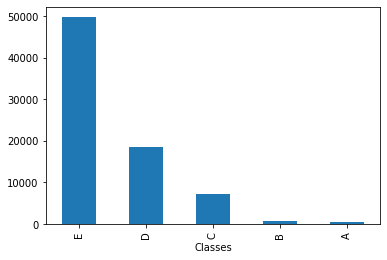

In [13]:
database_freq['Frequência'].plot.bar()

> ### Conclusões

A maior parte (64%) da nossa amostra tem renda até dois salários mínimos, enquanto pouco mais de 10% tem renda superior a 5 salários mínimos, sendo o restante (24%) ganha entre 2 e 5 salários mínimos. Temos aqui uma distribuição com assimetria à direita.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

Variáveis quantitativas: São aquelas cujos valores são expressos em números.
Estão presentes no nosso dataset as seguintes: 
* IDADE
* ALTURA
* RENDA

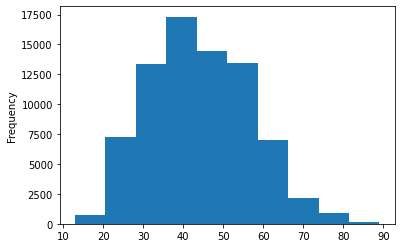

In [14]:
dados.query('Idade < 90')['Idade'].plot.hist()

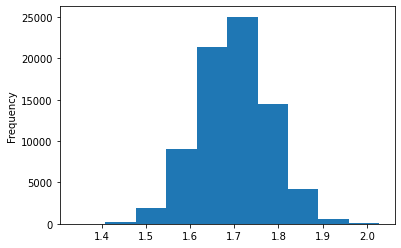

In [15]:
dados['Altura'].plot.hist()

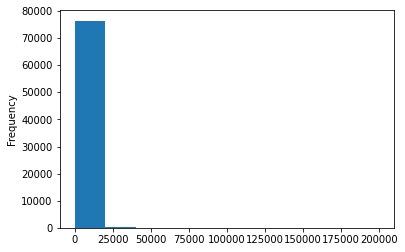

In [16]:
dados['Renda'].plot.hist()

> ### Conclusões

Em relação a variável Idade, podemos ver que ela se aproxima de uma distribuição normal simetrica, no entanto, não tem uma assimetria perfeita (de acordo com o gráfico).
Já a variável idade apresenta uma distribuição simétrica próxima a uma normal.
Por fim, a variável renda apresenta o que já tinhamos previsto, com a maior parte próximo dos quantis mais baixos (representando a população mais pobre, que recebe até 2 salários mínimos). Além disso, dependendo da nossa forma de validação poderiamos considerar alguns valores como outliers, visto que puxam muito a cauda do nosso histograma (renda = 200.000), mas no momento, não iremos tratar esses valores.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

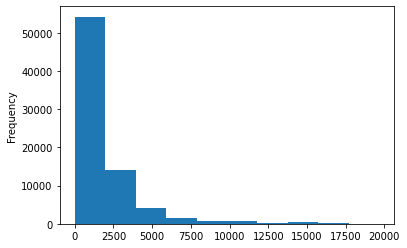

In [17]:
dados.query('Renda < 20000')['Renda'].plot.hist()

Evidenciamos que a maior parte da população fica próximo de 2 salários mínimos, agora com essa visão mais micro

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [18]:
#dicionário das variáveis qualitativas
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [19]:
#iremos fazer um cruzamento com a função crosstab que é nativa do pandas
#primeiro faremos a tabela de frequência
frequencia = pd.crosstab(dados['Sexo'],
            dados['Cor'])
frequencia.rename(cor, axis='columns', inplace = True) #renomeando as colunas
frequencia.rename(sexo, axis='index', inplace = True)  #renomeando as linhas
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [20]:
#tabela de porcentagem de cada frequência
porcentagem = pd.crosstab(dados['Sexo'],
            dados['Cor'],
            normalize = True)*100
porcentagem.rename(cor, axis='columns', inplace = True) #renomeando as colunas
porcentagem.rename(sexo, axis='index', inplace = True)  #renomeando as linhas
porcentagem

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Podemos notar que o percentual masculino é maior que o feminino, e que a cor que mais representa o domicílio é a parda, seguida da amarela e em terceiro lugar a branca. 
Lembrando que é uma autodeclaração

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [21]:
dados['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [22]:
dados['Renda'].median()

1200.0

### Obtenha a moda

In [23]:
dados['Renda'].mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [24]:
dados['Renda'].mad()

1526.4951371638058

### Obtenha a variância

In [25]:
dados['Renda'].var()

11044906.006217021

### Obtenha o desvio-padrão

In [26]:
dados['Renda'].std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [47]:
renda_medida_central = pd.crosstab(dados['Cor'],
            dados['Sexo'],
            values = dados['Renda'],
            aggfunc = {'mean', 'median', 'max'})
renda_medida_central.rename(sexo, axis='columns', inplace = True) #renomeando as colunas
renda_medida_central.rename(cor, axis='index', inplace = True)  #renomeando as linhas
renda_medida_central

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Percebemos que o homem amarelo tem uma renda média e mediana maior que todos os outros tipos de cor e sexo, no entanto, quando olhamos o valor máximo o homem branco possui um valor muito maior em comparação aos outros, o que pode explicar a variância e o desvio padrão muito altos

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [49]:
renda_dispersao = pd.crosstab(dados['Cor'],
            dados['Sexo'],
            values = dados['Renda'],
            aggfunc = {'mad', 'var', 'std'})
renda_dispersao.rename(sexo, axis='columns', inplace = True) #renomeando as colunas
renda_dispersao.rename(cor, axis='index', inplace = True)  #renomeando as linhas
renda_dispersao

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

É notável que o maior desvio padrão é do sexo feminino da cor indígena, onde tinha a segunda maior renda máxima de 120.000, neste caso, os dados estão muito dispersos, podendo afetar um futuro modelo caso seja necessário.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

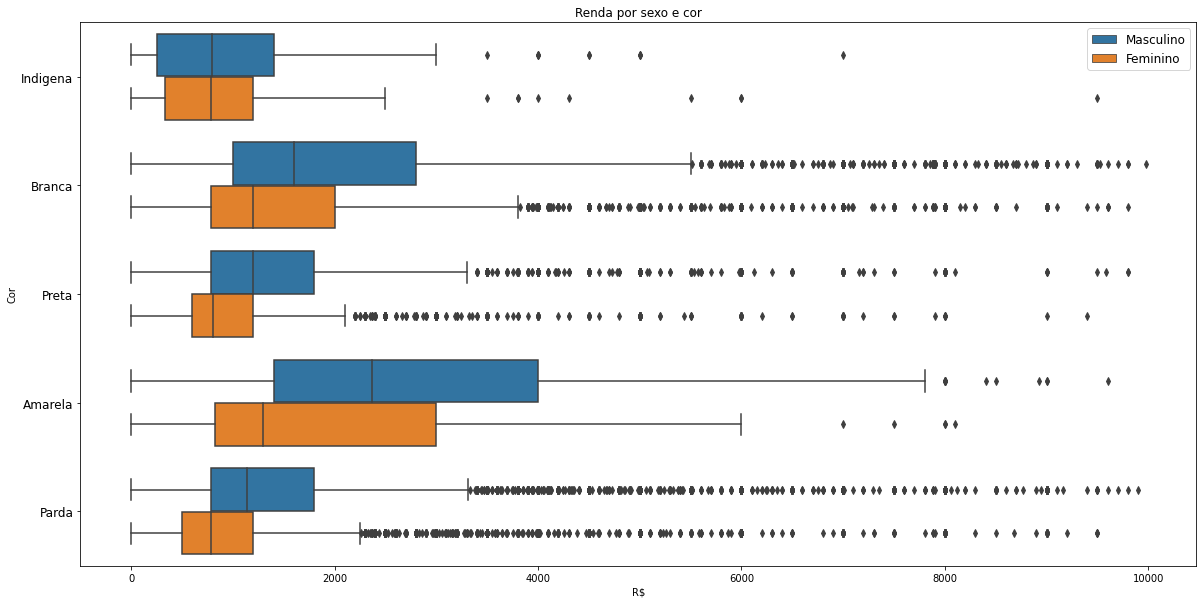

In [36]:
ax = sns.boxplot(x='Renda', y='Cor', hue='Sexo', data=dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(20,10)
ax.set_title('Renda por sexo e cor')
ax.set_xlabel('R$')
ax.set_yticklabels(['Indigena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)
ax

> ### Conclusões

A cor amarela tem uma dispersão muito grande da sua renda, além disso, a maioria das cores possuem renda menor do que 2000 reais, sendo que 50% da amostra de cada cor está abaixo dessa renda, exceto a amostra da cor amarela

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [37]:
from scipy import stats
stats.percentileofscore(list(dados['Renda']), 788, kind='weak')
print('{:.2f}% das pessoas da nossa base de dados ganha um salário mínimo (R$ 788,00) ou menos'.\
      format(stats.percentileofscore(list(dados['Renda']), 788, kind='weak')))

28.87% das pessoas da nossa base de dados ganha um salário mínimo (R$ 788,00) ou menos


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [43]:
dados['Renda'].quantile(0.99)
print('O valor máximo ganho por 99% das pessoas da nossa amostra, é de R$ {:.2f}'.format(dados['Renda'].quantile(0.99)))

O valor máximo ganho por 99% das pessoas da nossa amostra, é de R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [46]:
renda_func = pd.crosstab(dados['Anos de Estudo'],
            dados['Sexo'],
            values = dados['Renda'],
            aggfunc = {'mean', 'median', 'max', 'std'})
renda_func.rename(sexo, axis='columns', inplace = True) #renomeando as colunas
renda_func.rename(anos_de_estudo, axis='index', inplace = True)  #renomeando as linhas
renda_func

max                   mean               \
Sexo                           Masculino  Feminino    Masculino     Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   30000.0   10000.0   799.494638   516.201748   
1 ano                            30000.0    2000.0   895.629047   492.771987   
2 anos                           40000.0    4000.0   931.178986   529.911638   
3 anos                           80000.0    3500.0  1109.203862   546.853916   
4 anos                           50000.0   10000.0  1302.329283   704.279111   
5 anos                           35000.0    8000.0  1338.653218   781.389776   
6 anos                           25000.0    6000.0  1448.875419   833.732824   
7 anos                           40000.0    9000.0  1465.497940   830.751004   
8 anos                           30000.0   18000.0  1639.396667   933.615351   
9 anos                           60000.0   20000.0  1508.038850   868.021700   
10 anos                          45000.0    6000.0  1731.270847   925.919225   
11 anos                         200000.0  100000.0  2117.060504  1286.790889   
12 anos                          30000.0  120000.0  2470.330776  1682.313725   
13 anos                          25000.0   20000.0  3195.099154  1911.730047   
14 anos                          50000.0   20000.0  3706.620269  2226.460457   
15 anos ou mais                 200000.0  100000.0  6134.279790  3899.513231   
Não determinados                  7000.0    3000.0  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

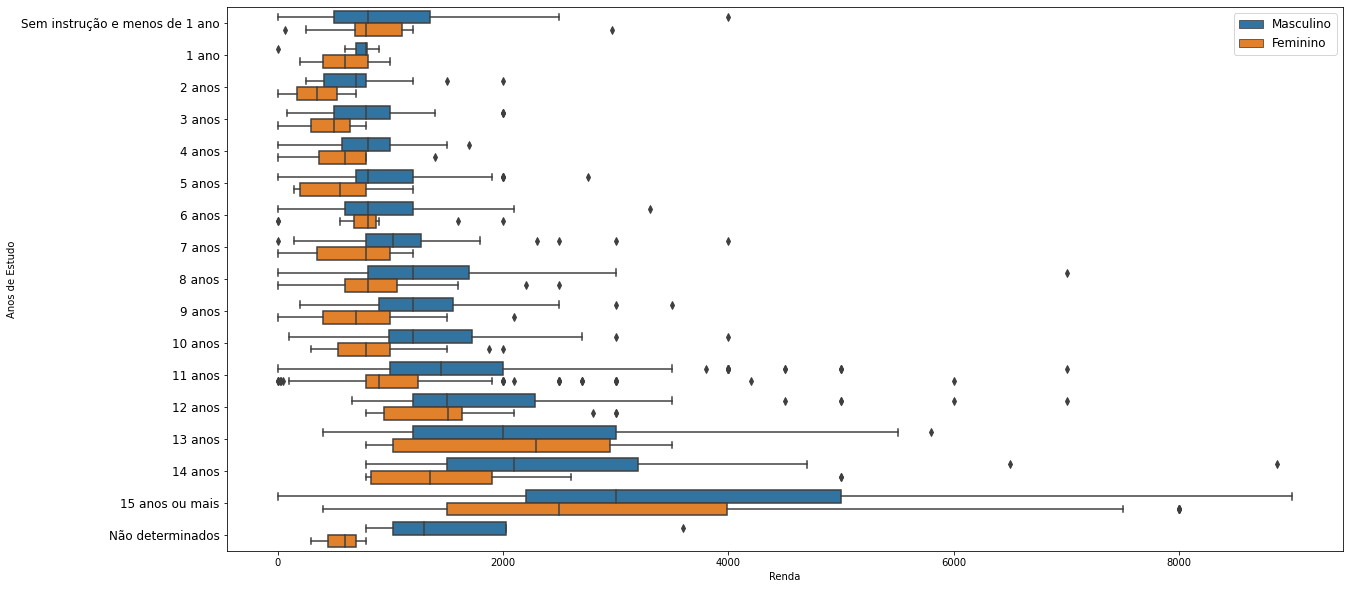

In [51]:
ax = sns.boxplot(x='Renda', y='Anos de Estudo', hue='Sexo', data=dados.query('Renda < 10000 and Idade == 30'), orient = 'h')
ax.figure.set_size_inches(20,10)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize = 12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)
ax

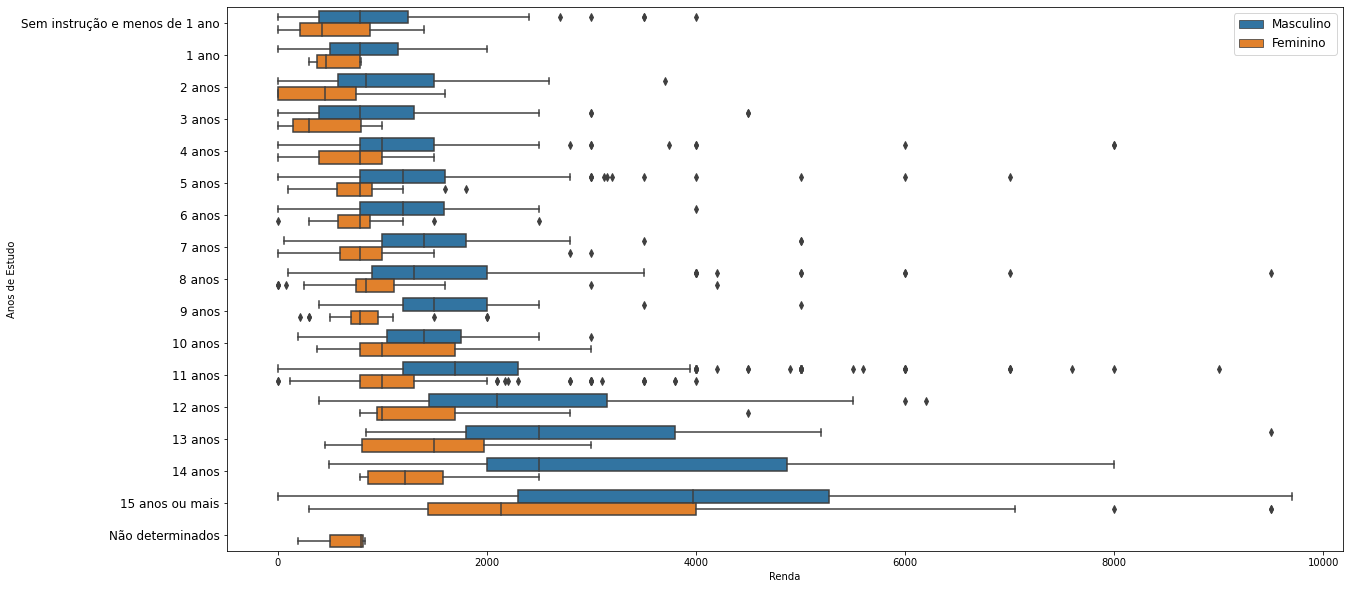

In [52]:
ax = sns.boxplot(x='Renda', y='Anos de Estudo', hue='Sexo', data=dados.query('Renda < 10000 and Idade == 40'), orient = 'h')
ax.figure.set_size_inches(20,10)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize = 12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)
ax

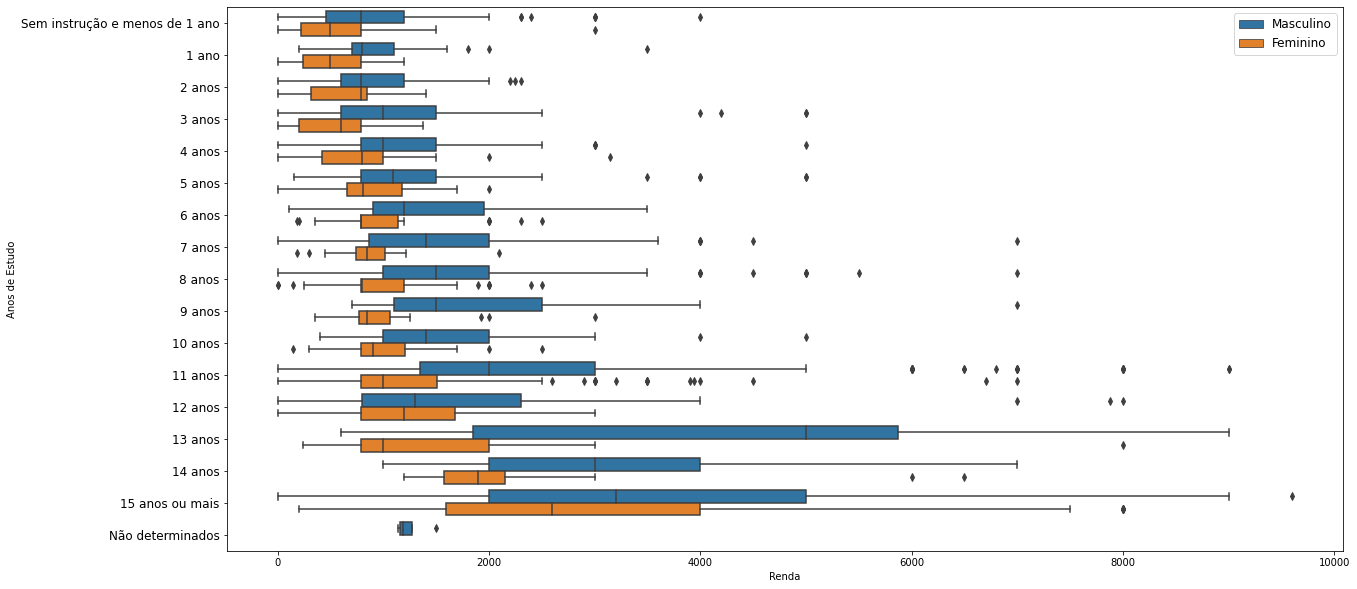

In [53]:
ax = sns.boxplot(x='Renda', y='Anos de Estudo', hue='Sexo', data=dados.query('Renda < 10000 and Idade == 50'), orient = 'h')
ax.figure.set_size_inches(20,10)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize = 12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)
ax

> ### Conclusões

Para 3 anos diferentes de comparação (30, 40 e 50 anos) pode se notar que a renda tem uma maior variância a partir do décimo segundo ano de estudo, sendo normalmente no término do ensino médio, ou seja, uma das hipóteses é que as pessoas que estudam além do ensino médio, tem rendas maiores. No entanto, não necessariamente você estudando irá lhe garantir uma renda maior, dada a variabilidade da variável renda notamos isso 

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [57]:
renda_fed = dados.groupby(['UF']).agg({'Renda':['mean', 'median', 'max', 'std']}).round(2)
renda_fed.rename(index = uf)

Renda                         
                        mean  median     max      std
UF                                                   
Rondônia             1789.76  1200.0   50000  2406.16
Acre                 1506.09   900.0   30000  2276.23
Amazonas             1445.13   900.0   22000  1757.94
Roraima              1783.59  1000.0   20000  2079.66
Pará                 1399.08   850.0   50000  2053.78
Amapá                1861.35  1200.0   15580  2020.69
Tocantins            1771.09  1000.0   60000  2934.59
Maranhão             1019.43   700.0   30000  1887.82
Piauí                1074.55   750.0   40000  2373.36
Ceará                1255.40   789.0   25000  1821.96
Rio Grande do Norte  1344.72   800.0   15500  1651.81
Paraíba              1293.37   788.0   30000  1950.27
Pernambuco           1527.08   900.0   50000  2389.62
Alagoas              1144.55   788.0   11000  1237.86
Sergipe              1109.11   788.0   16000  1479.00
Bahia                1429.65   800.0  200000  3507.92
Minas Gerais         2056.43  1200.0  100000  3584.72
Espírito Santo       2026.38  1274.0  100000  3513.85
Rio de Janeiro       2496.40  1400.0  200000  5214.58
São Paulo            2638.10  1600.0   80000  3503.78
Paraná               2493.87  1500.0  200000  4302.94
Santa Catarina       2470.85  1800.0   80000  3137.65
Rio Grande do Sul    2315.16  1500.0   35000  2913.34
Mato Grosso do Sul   2262.60  1500.0   42000  3031.42
Mato Grosso          2130.65  1500.0   35000  2542.63
Goiás                1994.58  1500.0   30000  2221.93
Distrito Federal     4241.95  2000.0  100000  5550.46

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

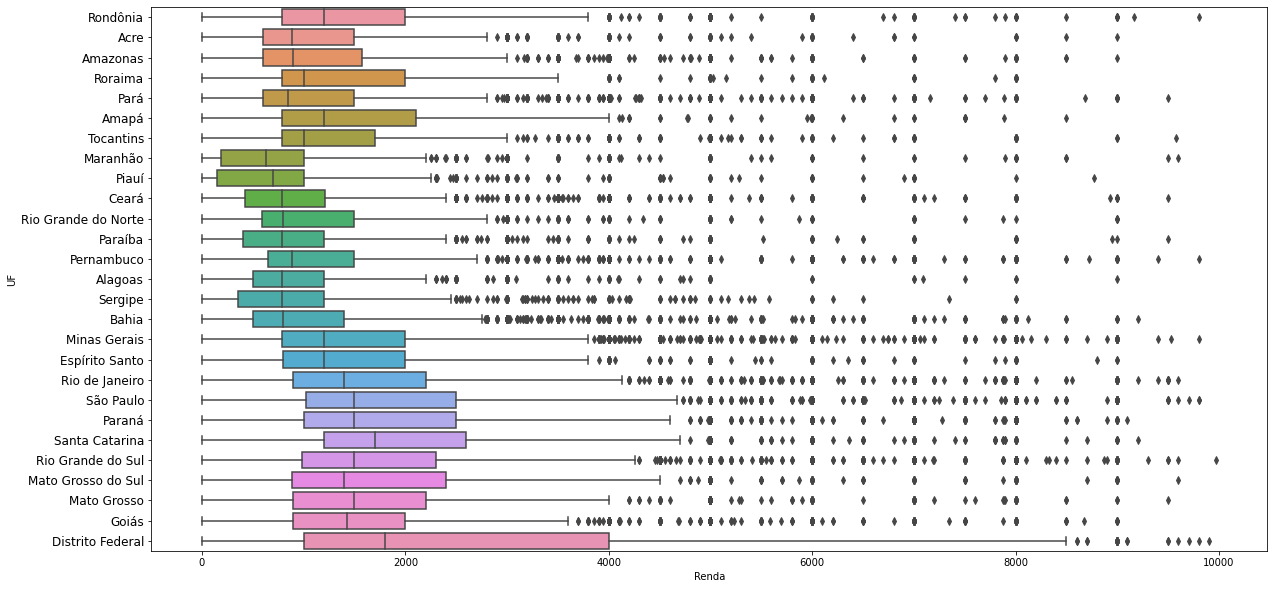

In [58]:
ax = sns.boxplot(x='Renda', y='UF', data=dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(20,10)
ax.set_yticklabels([key for key in uf.values()], fontsize = 12)
ax

> ### Conclusões

A renda do Distrito Federal (UF = 53) tem uma maior variância do que todas as outras, ou seja, os valores de renda são mais espalhados na nossa amostra.